Create a dataset from 3 numpy files

Import numpy file for each shape

In [1]:
import numpy as np
circle = np.load("../data/mini_dataset/circle/circle_data_preprocess.npy")    # (N1, 128, 128)
square = np.load("../data/mini_dataset/square/square_data_preprocess.npy")    # (N2, 128, 128)
triangle = np.load("../data/mini_dataset/triangle/triangle_data_preprocess.npy")# (N3, 128, 128)

print(circle.shape)
print(square.shape)
print(triangle.shape)

(14, 128, 128)
(14, 128, 128)
(16, 128, 128)


Create corresponding labels.
Create 3 numpy array:
- 1 filled with 0 for circles, the shape is `len(circle)`
- 1 filled with 1 for squares, the shape is `len(square)`
- 1 filled with 2 for triangles, the shape is `len(triangle)`


In [2]:
y_circle = np.zeros(len(circle), dtype=int)           # classe 0
y_square = np.ones(len(square), dtype=int)            # classe 1
y_triangle = np.full(len(triangle), 2, dtype=int) 

print(y_circle.shape)
print(y_square.shape)
print(y_triangle.shape)

print(y_circle)
print(y_square)
print(y_triangle)



(14,)
(14,)
(16,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Concatenante the 3 arrays to pass from shapes (x,) (y,) (z,) to (x+y+z,)

In [3]:
y = np.concatenate([y_circle, y_square, y_triangle], axis=0)
print(y.shape)
print(y)

(44,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


Concatenate the 3 numpy array to pass from dimensions (x, 128, 128) (y, 128, 128) (y, 128, 128) to 1 array of shape (x+y+z,128, 128)

In [4]:
X = np.concatenate([circle, square, triangle], axis=0) 
print(X.shape)

(44, 128, 128)


Keras need data in the shape 

In [5]:
print(X.shape)
X = X[..., np.newaxis]
print(X.shape)

(44, 128, 128)
(44, 128, 128, 1)


Shuffle with scikit learn to avoid learning on blocks

In [6]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)
print(y)

[2 1 1 2 2 2 0 0 0 0 0 1 2 1 1 0 2 1 0 1 2 1 0 2 2 0 0 2 0 2 1 0 2 1 2 0 1
 1 2 1 0 1 2 2]


Split dataset in train and test

In [7]:
from sklearn.model_selection import train_test_split

# Suppose que X et y sont déjà construits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # 20% en test
    random_state=42,       # pour reproductibilité
    stratify=y             # pour garder la proportion des classes
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(35, 128, 128, 1)
(9, 128, 128, 1)
(35,)
(9,)


Create a CNN 2D Model

c:\Users\cayez\Documents\DONNEES_SIMON\python_env\donnees\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3214 - loss: 1.1000 - val_accuracy: 0.2857 - val_loss: 2.1895
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.3929 - loss: 1.7965 - val_accuracy: 0.2857 - val_loss: 1.3500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.3214 - loss: 1.2044 - val_accuracy: 0.2857 - val_loss: 1.1456
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3214 - loss: 1.1520 - val_accuracy: 0.2857 - val_loss: 1.1062
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.3214 - loss: 1.1262 - val_accuracy: 0.4286 - val_loss: 1.0878
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.2857 - loss: 1.1182 - val_accuracy: 0.4286 - val_loss: 1.0886
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.2857 - loss: 1.1131 - val_accuracy: 0.4286 - val_loss: 1.0926
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.2857 - loss: 1.1046 - val_accuracy: 0.4286 - val_loss: 1.

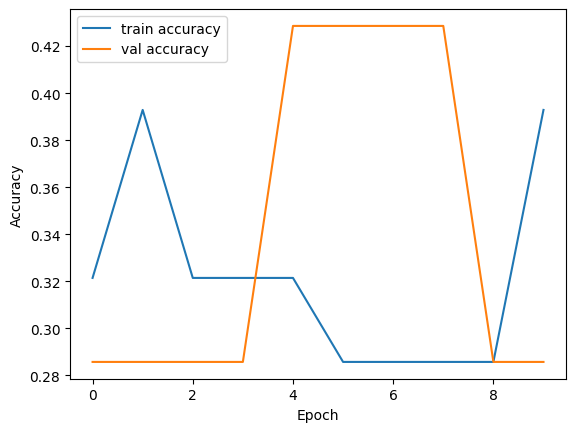

In [8]:
import numpy as np
from tensorflow.keras import layers, models

# --- ton modèle ---
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- entraînement ---
history = model.fit(
    X_train, y_train,          # tes données d'entraînement
    epochs=10,                 # nombre d'epochs
    batch_size=32,             # taille de batch
    validation_split=0.2,      # fraction du train utilisée pour validation
    verbose=1                  # affiche les métriques
)

# --- tracé des courbes de métriques ---
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# import numpy as np
# from tensorflow.keras import layers, models



# model = models.Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(3, activation='softmax')  # 3 classes
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # pas de one-hot
#               metrics=['accuracy'])
